In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
#import pandas_datareader as web
from pandas_datareader import data as pdr
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')

In [3]:
# Get the stock data from yahoo finance
yf.pdr_override() 
df = pdr.get_data_yahoo("AAPL", start="2012-01-01", end="2021-08-18")
df # To see the data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.610315,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.678085,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.818838,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.952841,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.932299,394024400
...,...,...,...,...,...,...
2021-08-11,146.050003,146.720001,145.529999,145.860001,145.860001,48493500
2021-08-12,146.190002,149.050003,145.839996,148.889999,148.889999,72282600
2021-08-13,148.970001,149.440002,148.270004,149.100006,149.100006,59318800


Exception in thread Thread-7:
Traceback (most recent call last):
  File "c:\users\lalit\miniconda3\lib\site-packages\urllib3\response.py", line 438, in _error_catcher
    yield
  File "c:\users\lalit\miniconda3\lib\site-packages\urllib3\response.py", line 767, in read_chunked
    chunk = self._handle_chunk(amt)
  File "c:\users\lalit\miniconda3\lib\site-packages\urllib3\response.py", line 711, in _handle_chunk
    value = self._fp._safe_read(amt)
  File "c:\users\lalit\miniconda3\lib\http\client.py", line 609, in _safe_read
    data = self.fp.read(amt)
  File "c:\users\lalit\miniconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "c:\users\lalit\miniconda3\lib\ssl.py", line 1241, in recv_into
    return self.read(nbytes, buffer)
  File "c:\users\lalit\miniconda3\lib\ssl.py", line 1099, in read
    return self._sslobj.read(len, buffer)
ConnectionAbortedError: [WinError 10053] An established connection was aborted by the software in your host machine

D

In [ ]:
# visualizing the closing price history
plt.figure(figsize = (16,8))
plt.title("Close Price History")
plt.plot(df["Close"])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closing Price In USD($)',fontsize = 18)
plt.show()

In [4]:
# Select only close column
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len

1938

In [5]:
# Scale the data (Normalization)
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00538946],
       [0.00596485],
       [0.00715991],
       ...,
       [0.9852741 ],
       [1.        ],
       [0.99322027]])

In [6]:
# Creating the training data set
train_data = scaled_data[0:training_data_len,:]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<= 61:
        print(x_train)
        print(y_train)

[array([0.00538946, 0.00596485, 0.00715991, 0.00829768, 0.00812324,
       0.00851639, 0.00833674, 0.00803472, 0.00762335, 0.00889651,
       0.0100447 , 0.00969061, 0.00775092, 0.00960209, 0.00777957,
       0.01461403, 0.0140855 , 0.01477545, 0.01626731, 0.01717076,
       0.01709526, 0.01681668, 0.01800392, 0.01912086, 0.02038622,
       0.02243005, 0.02672339, 0.02678848, 0.02917859, 0.03096466,
       0.02789502, 0.02907705, 0.02905362, 0.03236801, 0.03189675,
       0.03276895, 0.03433632, 0.03520854, 0.03772102, 0.03955134,
       0.04007987, 0.04026474, 0.03713521, 0.03638015, 0.03649211,
       0.03943419, 0.04026214, 0.0420404 , 0.04623219, 0.05182474,
       0.05077809, 0.05078069, 0.05482409, 0.05608945, 0.05518859,
       0.05436586, 0.05350927, 0.056355  , 0.05830771, 0.05912524])]
[0.05710484315773823]
[array([0.00538946, 0.00596485, 0.00715991, 0.00829768, 0.00812324,
       0.00851639, 0.00833674, 0.00803472, 0.00762335, 0.00889651,
       0.0100447 , 0.00969061, 0.007

In [7]:
# converting into numpy array
x_train = np.array(x_train)
y_train = np.array(y_train)

In [8]:
# Reshape the data
# LSTM module is requireding for 3 dim array so reshaping
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) 
x_train.shape

(1878, 60, 1)

In [9]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [10]:
# compile the model
model.compile(optimizer='adam', loss= 'mean_squared_error')

In [11]:
# Train the model
model.fit(x_train, y_train, batch_size=1,epochs=1)

1878/1878 [==============================] - 26s 13ms/step - loss: 1.8770e-04


In [12]:
# Create the testing data set
# Create a new arry containing scaled values from index 1878 to 1938
test_data = scaled_data[training_data_len - 60: , :]
# create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [13]:
# convert the data to a numpy array
x_test = np.array(x_test)

In [14]:
# Reshape the data to 3 dim
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [15]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [16]:
# Evaluating the model using root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.5017081883328021

In [17]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

C:\Users\Lalit\AppData\Local\Temp/ipykernel_23368/1606462354.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


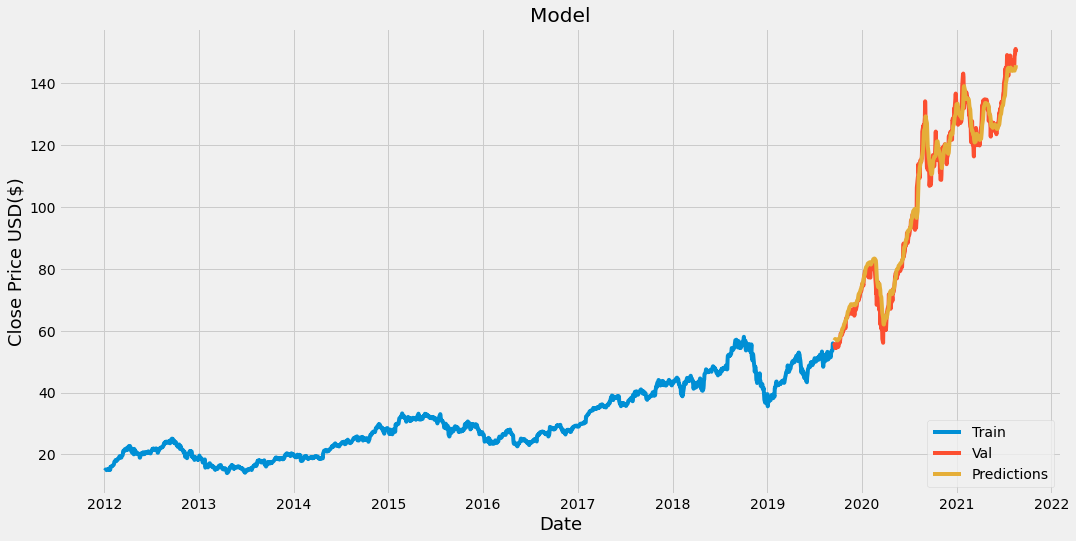

In [18]:
# visulize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD($)", fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train","Val","Predictions"],loc="lower right")
plt.show()

In [19]:
# Show the close and predicted prices
valid

,Close,Predictions
Date,,
2019-09-17,55.174999,56.863014
2019-09-18,55.692501,57.031673
2019-09-19,55.240002,57.219120
2019-09-20,54.432499,57.314777
2019-09-23,54.680000,57.227776
...,...,...
2021-08-11,145.860001,144.228180
2021-08-12,148.889999,144.100937
2021-08-13,149.100006,144.481186


In [20]:
# Loding the stock data
apple_data = pdr.get_data_yahoo("AAPL", start="2012-01-01", end="2021-08-18")
new_df = apple_data.filter(['Close'])
# Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values

[*********************100%***********************]  1 of 1 completed


In [21]:
# Scale the data (Normalization)
last_60_days_scaled = scaler.transform(last_60_days)

In [22]:
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test) # convert to numpy array
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
# Get the predicted scale price
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[146.55017]]


In [23]:
apple_data2 = pdr.get_data_yahoo("AAPL", start="2021-08-18", end="2021-08-18")
print(apple_data2["Close"]) # Printing actual value of the stock

[*********************100%***********************]  1 of 1 completed
Date
2021-08-17    150.190002
Name: Close, dtype: float64
